# K-Means Implementation

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
def generate_random_coordinates(num_points, x_range, y_range):
    x_coords = np.random.uniform(x_range[0], x_range[1], num_points)
    y_coords = np.random.uniform(y_range[0], y_range[1], num_points)
    return np.column_stack((x_coords, y_coords))

In [ ]:
points = []
for xr, yr in [[(0,1), (3,4)], [(2,1), (-1,-2)], [(3, 5), (3,5)]]:
    points.extend(generate_random_coordinates(10, xr, yr).tolist())

<Axes: xlabel='x', ylabel='y'>

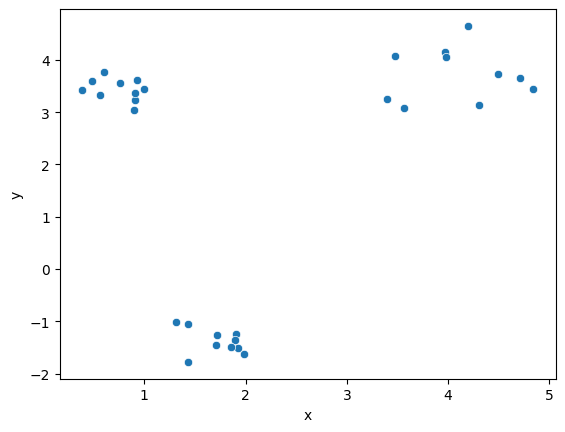

In [ ]:
df = pd.DataFrame(points, columns=['x','y'])
sns.scatterplot(x='x', y='y', data=df)

In [ ]:
class KMeans:

    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, points: np.array):
        n, d = points.shape
        
        centroid_pts = points[np.random.randint(low=0, high=n, size=self.k)]
        pts_to_centroid = [0]*n

        for _ in range(self.max_iters):
            for i in range(n):
                pts_to_centroid[i] = self.get_closest_centroid(points[i], centroid_pts)
    
            for i in range(self.k):
                cluster_points = [ix for ix, j in enumerate(pts_to_centroid) if j==i]
                centroid_pts[i] = points[cluster_points].mean(axis=0)
        return pts_to_centroid
            
    def get_closest_centroid(self, point, centroids):
        d = float('inf')
        r = 0
        for j, cp in enumerate(centroids):
            if self.distance(point, cp)<d:
                d = self.distance(point, cp)
                r = j
        return r
    def distance(self, p1, p2): return np.linalg.norm(p1-p2)


In [ ]:
df['cluster'] = KMeans(3).fit(df.to_numpy())

<Axes: xlabel='x', ylabel='y'>

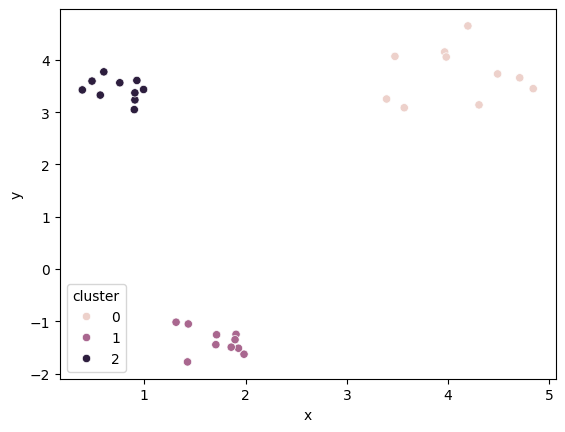

In [ ]:
sns.scatterplot(x='x', y='y', data=df, hue='cluster')